### Model Comparison
Comparing models is something data scientists do all the time. There's very rarely just one model that would be possible to run for a given situation, so learning to choose the best one is very important.

Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. Submit a link to your notebook below.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor

from sklearn import linear_model

# Suppress annoying harmless error.

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from matplotlib.mlab import PCA as mlabPCA
from sklearn.decomposition import PCA 

In [101]:
# Process the amazon datafile:
data_wine = pd.read_csv('U3L14 - challenge - wine example\\winequality-white.csv'
                       ,delimiter=';',header=0)

In [7]:
data_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


### We will try to predict the quality of the wine

### KNN regression
we'll use all 11 features to predict the 12th.

In [17]:
# Prepare the data:
X = data_wine.drop(['quality'] , axis=1 )
y = data_wine['quality']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


** Feature Scaling**

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.



In [11]:
#scaler = StandardScaler()  
#scaler.fit(X_train)
#
#X_train = scaler.transform(X_train)  
#X_test = scaler.transform(X_test)  


#### OR:

In [18]:
from scipy.stats import zscore

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [ ]:
# Note that `select_dtypes` returns a data frame. We are selecting only the columns
#numeric_cols = df.select_dtypes(include=[np.number]).columns
#df[numeric_cols].apply(zscore)

### Build our model.
* with `weigths`

In [20]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10 , weights='distance' )

In [21]:
# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred =  knn.predict(X_test)


In [22]:
y_pred

array([6.60417982, 5.91724671, 6.42605784, 6.28671574, 6.69067581,
       7.06857095, 6.26923425, 5.06377639, 5.65750202, 5.31168252,
       5.51080238, 6.73489435, 5.90167766, 5.7055276 , 5.46006787,
       5.99792089, 6.1139073 , 6.47438122, 7.13775672, 5.87571554,
       5.29185901, 5.86471851, 5.8111593 , 6.5464046 , 6.31064908,
       5.63139301, 5.00610038, 5.70410958, 5.49577268, 5.49798816,
       5.79971094, 6.63057758, 5.85621737, 5.26377136, 6.14102657,
       6.73500198, 5.5864428 , 6.07217087, 5.68741567, 6.1762594 ,
       6.82607903, 5.22220142, 6.37024476, 5.49916326, 6.53594013,
       5.        , 5.38562165, 5.47897493, 6.68085978, 5.60793849,
       5.        , 6.37862795, 6.31598592, 6.35030578, 4.74327323,
       6.21797357, 6.53201935, 5.74242352, 6.21876015, 6.62605721,
       5.79132312, 5.66263642, 6.63882754, 5.8059255 , 7.10530765,
       6.3774684 , 5.56309751, 6.48382349, 6.30767547, 5.00008647,
       5.68815249, 5.21921809, 5.70463209, 6.45091975, 5.41096

** Hold Out validation: **

In [23]:
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, y).score(X, y)))

With 20% Holdout: 0.44528626207914357
Testing on Sample: 1.0


**Cross Validation:**

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train , y_train , cv=10)

array([0.41835372, 0.52412682, 0.45686935, 0.51995348, 0.46401102,
       0.44726786, 0.52894473, 0.56097512, 0.46759804, 0.48720529])

In [25]:
score_w = cross_val_score(knn, X_train, y_train , cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: 0.46 (+/- 0.06)


### What is the optimal number of $k$'s?

In [26]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors_ = list(filter(lambda x: x % 2 != 0, myList))



In [27]:
# loading library
from sklearn.neighbors import KNeighborsRegressor

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors_:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10  
                             #, scoring='accuracy'  
                            )
    cv_scores.append(scores.mean())

In [28]:
cv_scores

[0.1885366959175578,
 0.3188826882461895,
 0.33982613887565877,
 0.3544821988898592,
 0.35117250124632543,
 0.3525731849509583,
 0.35040245502612727,
 0.3508440789964176,
 0.35085910771208556,
 0.34593783222745234,
 0.3452393550511762,
 0.3428401665087916,
 0.34456661805780325,
 0.34409589439894284,
 0.34440088973770566,
 0.3440784777230919,
 0.34400337908586265,
 0.34110445366999226,
 0.34053728185294424,
 0.33986853601504524,
 0.33871971035959303,
 0.3377858102285085,
 0.3359906678439166,
 0.33395660234837327,
 0.3327527438572727]

The optimal number of neighbors is 7


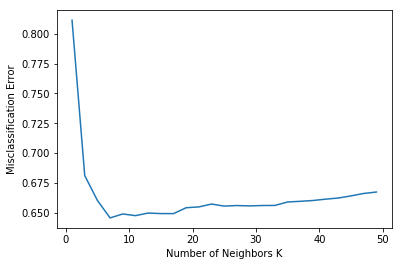

In [29]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors_[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors_, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Linear regression:

In [128]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
y_ols = data_wine['quality'].values.reshape(-1, 1)
X_ols = data_wine.drop(['quality'],axis=1)
regr.fit(X_ols, y_ols)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_ols, y_ols ))


Coefficients: 
 [[ 6.16540085e-02 -1.74798562e+00  9.15583801e-02  7.22028093e-02
  -1.83994287e+00  6.55645165e-03 -4.04411598e-04 -1.45098810e+02
   6.84817013e-01  5.00507734e-01  1.87930253e-01]]

Intercept: 
 [145.19432134]

R-squared:
0.2710327374505651


### Assumption two: multivariate normality

The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed. Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in data.


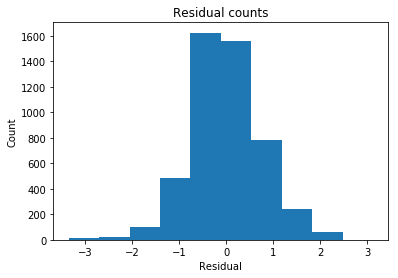

In [129]:
# Extract predicted values.
predicted = regr.predict(X_ols).ravel()
actual = data_wine['quality']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Assumption three: homoscedasticity

The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic.

For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance. This leads to overconfidence in the accuracy of your model's predictions.

Some fixes to heteroscedasticity include transforming the dependent variable and adding features that target the poorly-estimated areas. For example, if a model tracks data over time and model error variance jumps in the September to November period, a binary feature indicating season may be enough to resolve the problem.


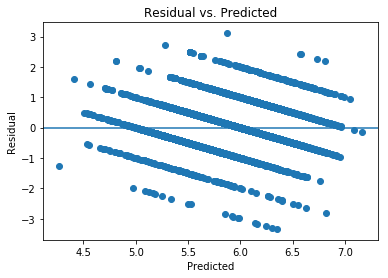

In [131]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

### Assumption one: linear relationship

As mentioned earlier, features in a regression need to have a linear relationship with the outcome. If the relationship is non-linear, the regression model will try to find any hint of a linear relationship, and only explain that – with predictable consequences for the validity of the model.

Sometimes this can be fixed by applying a non-linear transformation function to a feature. For example, if the relationship between feature and outcome is quadratic and all feature scores are > 0, we can take the square root of the features, resulting in a linear relationship between the outcome and sqrt(feature). 

In [30]:
data_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [32]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


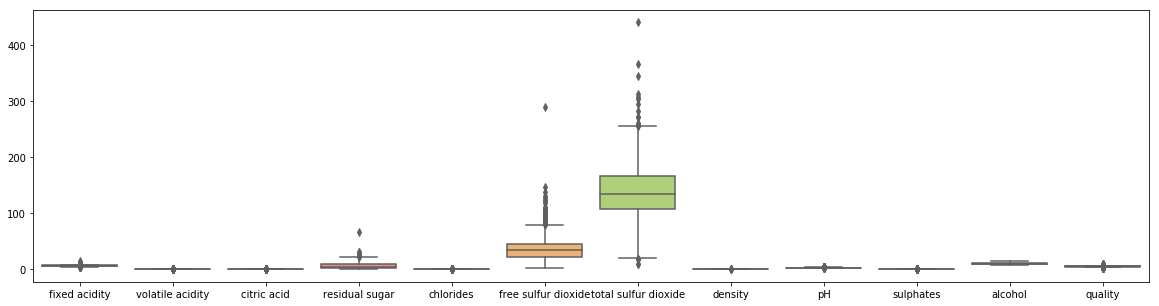

In [47]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.boxplot(data = data_wine , palette="Set3"   )
plt.show()

There are many outliers in "free sulfur dioxide" and	"total sulfur dioxide"

### Drop values in all columns that are outliers (more than 3 stdev from the mean):


In [102]:
#q = data_wine[['free sulfur dioxide', 'total sulfur dioxide']].quantile(0.99)
columns1=data_wine.columns.drop(['quality'])
q = data_wine[columns1].quantile(0.99)


In [103]:
q

fixed acidity             9.200000
volatile acidity          0.630000
citric acid               0.740000
residual sugar           18.800000
chlorides                 0.160000
free sulfur dioxide      81.000000
total sulfur dioxide    241.030000
density                   1.000302
pH                        3.600000
sulphates                 0.830000
alcohol                  13.400000
Name: 0.99, dtype: float64

In [104]:
#d2=data_wine[data_wine[['free sulfur dioxide', 'total sulfur dioxide']] < q][['free sulfur dioxide', 'total sulfur dioxide']]
d2=data_wine[data_wine[columns1] < q][columns1]

In [77]:
#data_wine.head(26)

In [105]:
# Replace the values of the two columns without the outliers:
data_wine[columns1] = d2[columns1]
#data_wine.head(26)

In [106]:
# Replace `nan` values with average of the column:
data_wine=data_wine.fillna(data_wine.mean())
data_wine.head(26)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270000,0.36,6.235448,0.045,45.0,170.000000,0.993946,3.00,0.45,8.8,6
1,6.3,0.300000,0.34,1.600000,0.049,14.0,132.000000,0.994000,3.30,0.49,9.5,6
2,8.1,0.280000,0.40,6.900000,0.050,30.0,97.000000,0.995100,3.26,0.44,10.1,6
3,7.2,0.230000,0.32,8.500000,0.058,47.0,186.000000,0.995600,3.19,0.40,9.9,6
4,7.2,0.230000,0.32,8.500000,0.058,47.0,186.000000,0.995600,3.19,0.40,9.9,6
5,8.1,0.280000,0.40,6.900000,0.050,30.0,97.000000,0.995100,3.26,0.44,10.1,6
6,6.2,0.320000,0.16,7.000000,0.045,30.0,136.000000,0.994900,3.18,0.47,9.6,6
7,7.0,0.270000,0.36,6.235448,0.045,45.0,170.000000,0.993946,3.00,0.45,8.8,6
8,6.3,0.300000,0.34,1.600000,0.049,14.0,132.000000,0.994000,3.30,0.49,9.5,6
9,8.1,0.220000,0.43,1.500000,0.044,28.0,129.000000,0.993800,3.22,0.45,11.0,6


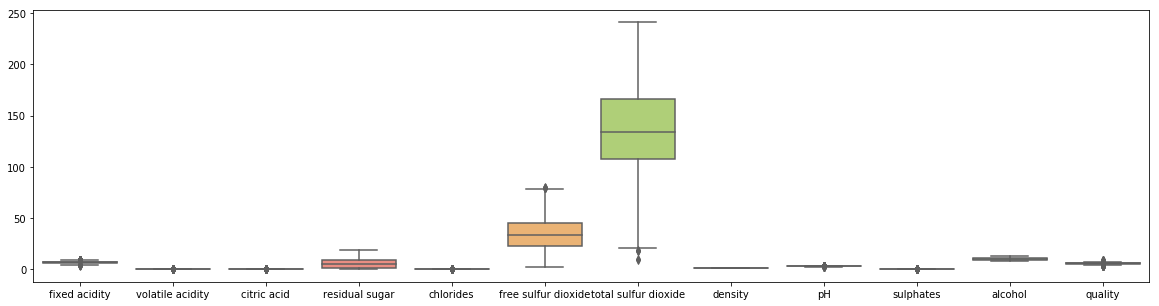

In [107]:
plt.figure(figsize=(20,5))
sns.boxplot(data = data_wine , palette="Set3"   )
plt.show()

In [108]:
data_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

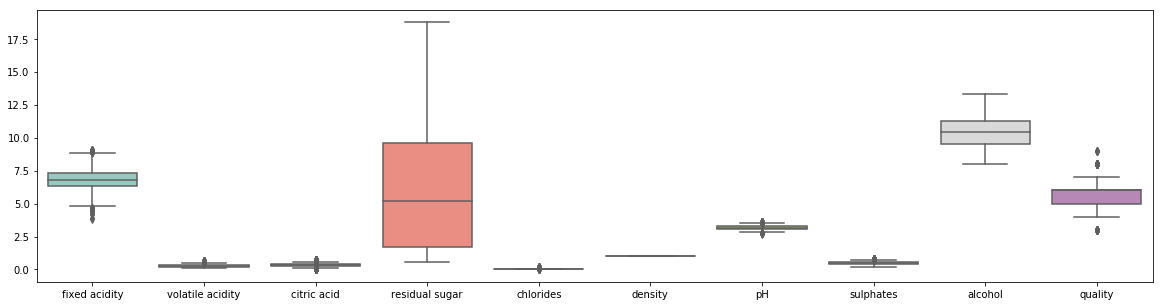

In [109]:
import seaborn as sns
plt.figure(figsize=(20,5))
sns.boxplot(data = data_wine.drop(['free sulfur dioxide', 'total sulfur dioxide'] , axis=1 ) , palette="Set3"   )
plt.show()

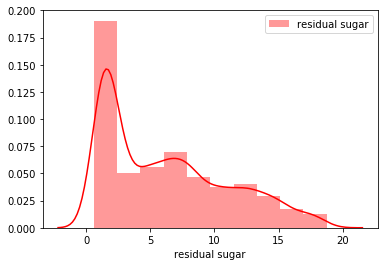

In [112]:
import seaborn as sns

sns.distplot( data_wine["residual sugar"] , color="red", label="residual sugar",bins=10)
plt.legend()
plt.show()

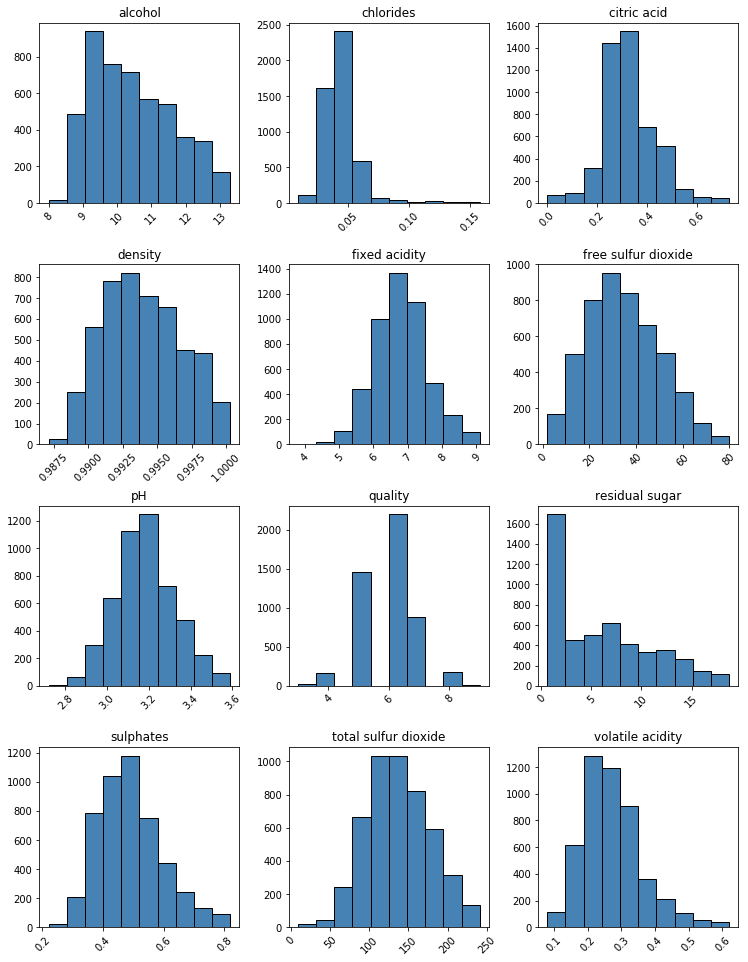

In [111]:
# Plot histograms to see what kind of distribution there is in each column:

fig = data_wine.hist(bins=10,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(7,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

### Create the default pairplot for numerical columns to better see how data is groupping:

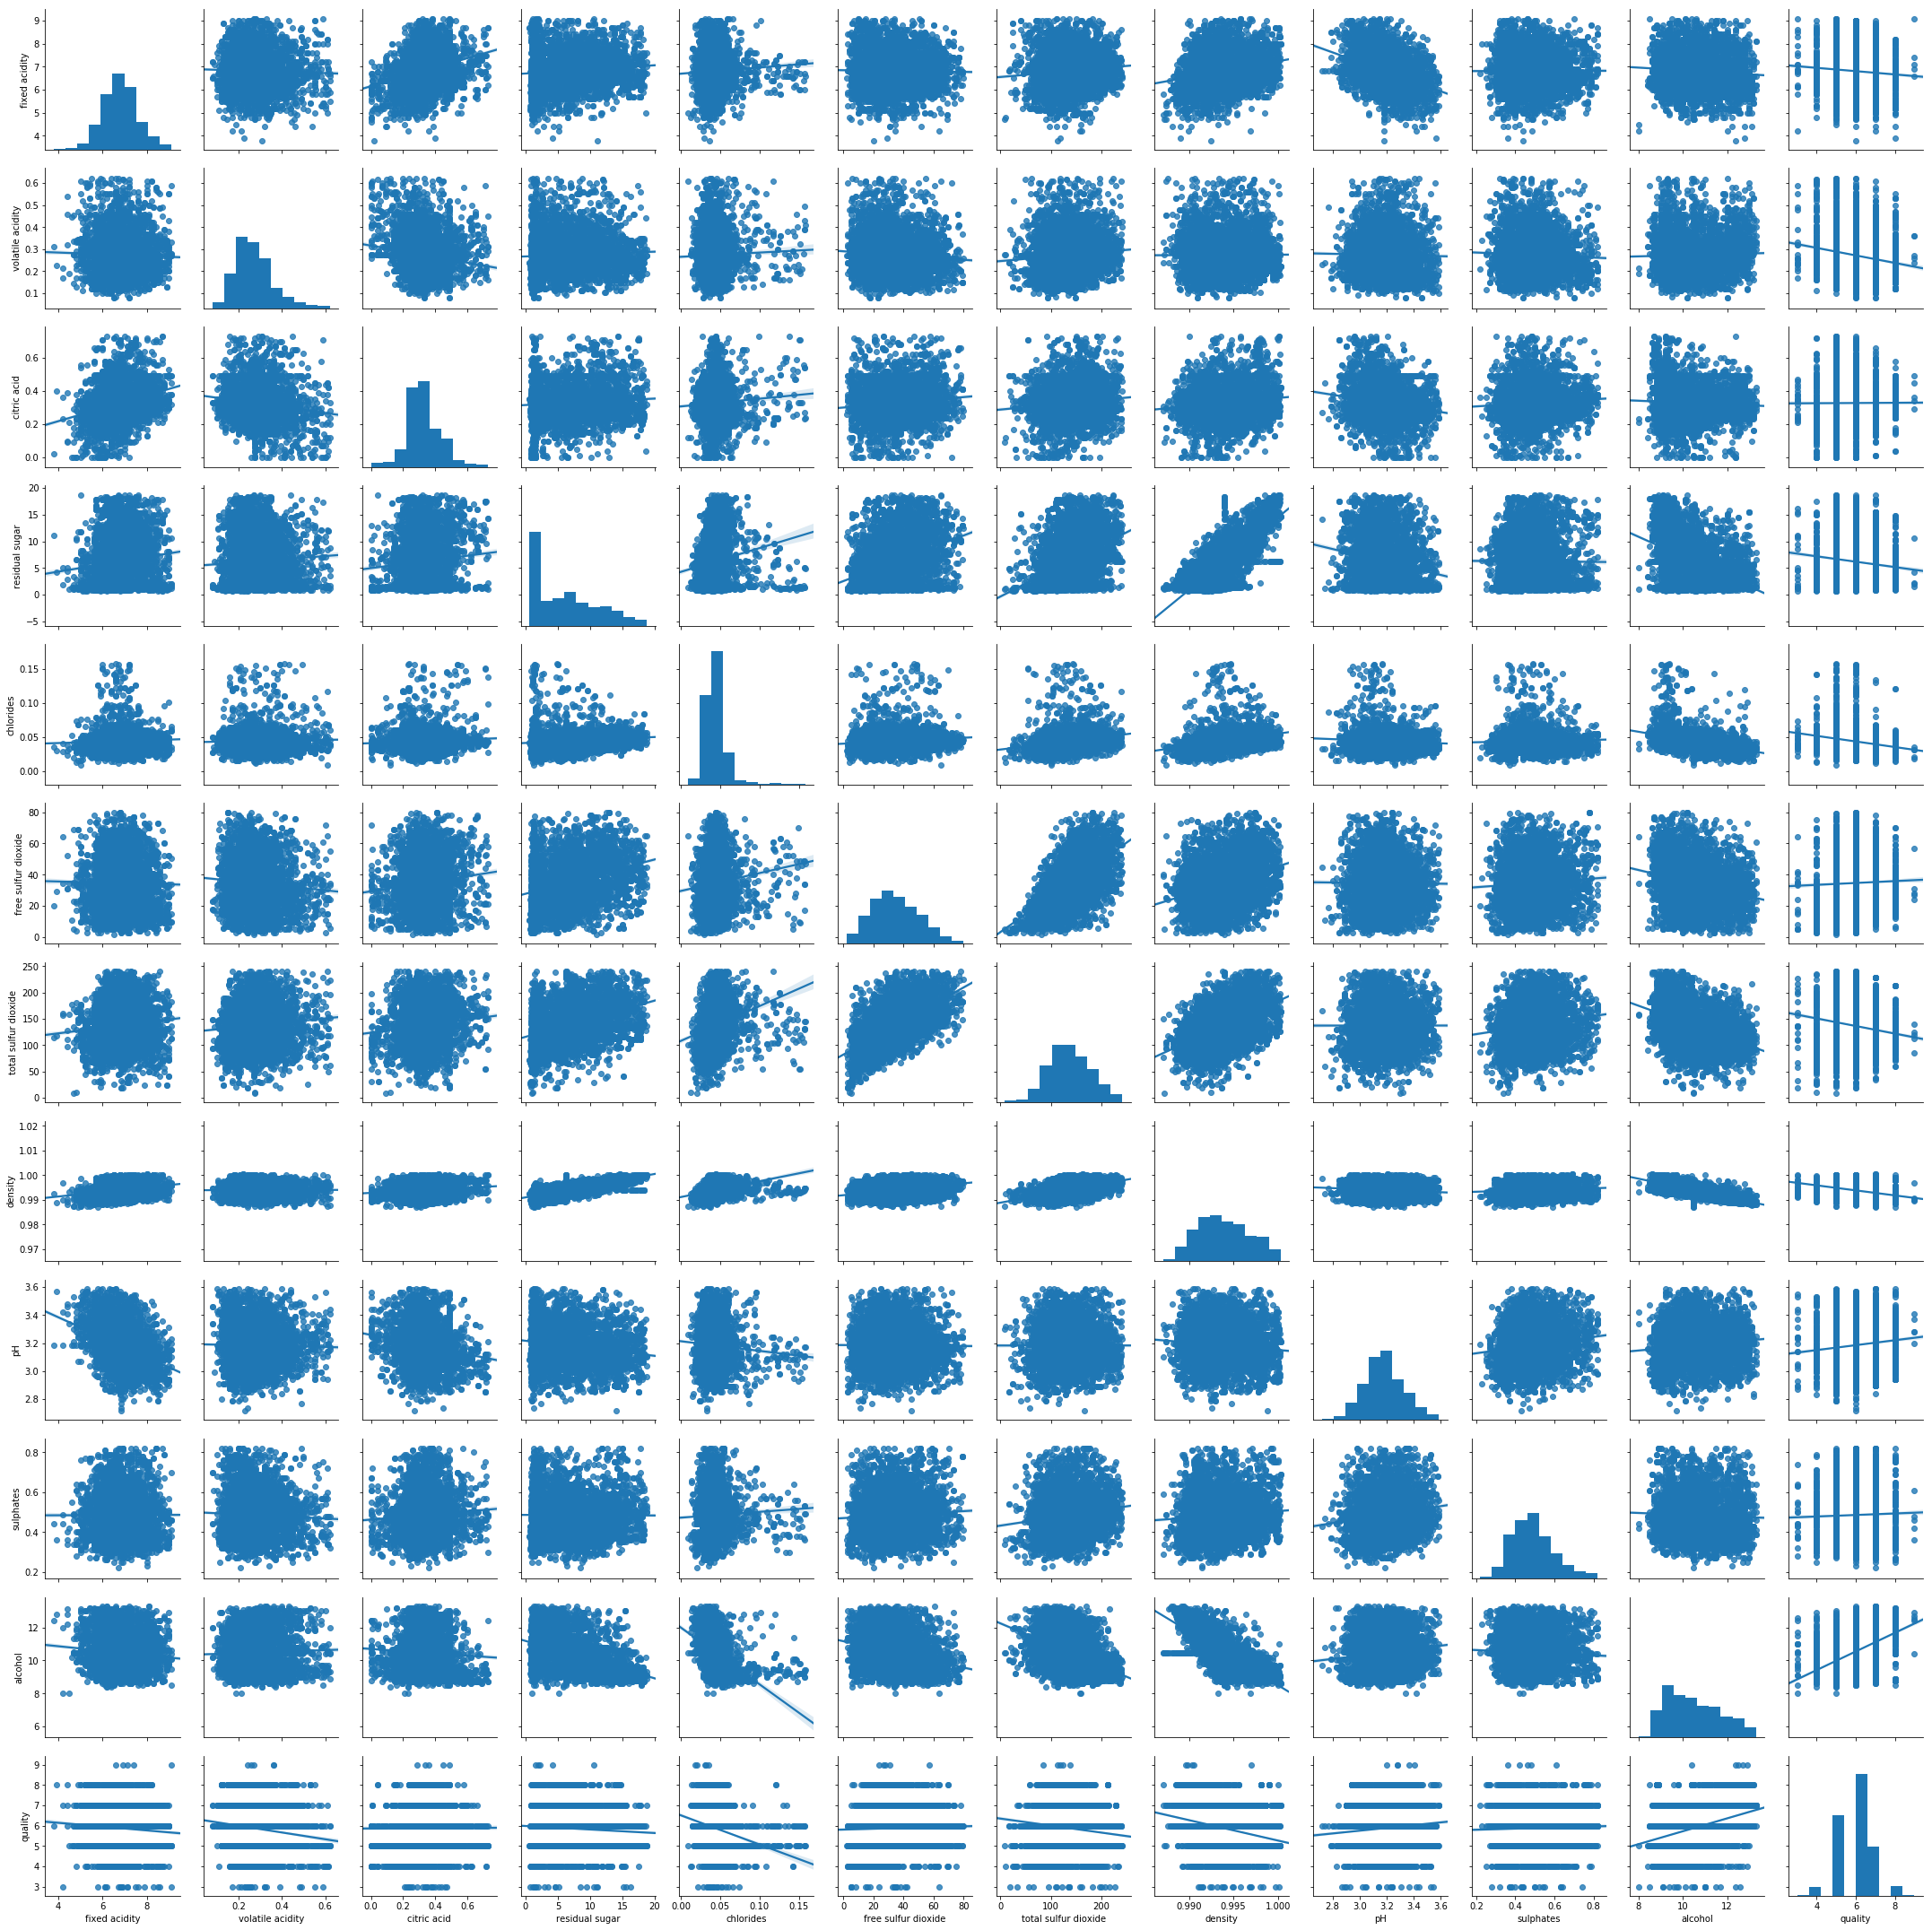

In [113]:
g=sns.pairplot(data_wine.fillna(0) , diag_kind='hist' , kind='reg' )
plt.show()

### Logarithm:

Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. Though, It can’t be applied to zero or negative values as well.


In [114]:
data_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [150]:
# Display if there are any below zero values:
data_wine[(data_wine < 0).any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


### Apply transformation to 3 columns that seem to not have a normal distribution:

In [121]:
data_wine_log = data_wine[['chlorides','residual sugar','volatile acidity']].apply(np.log)

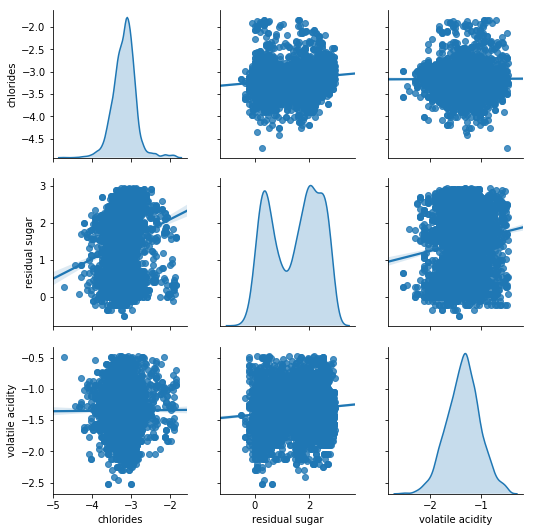

In [122]:
g=sns.pairplot(data_wine_log, diag_kind='kde' , kind='reg'
               #, plot_kws=dict(edgecolor="k", linewidth=0.5)
               , diag_kws=dict(shade=True)
              )
plt.show()

In [ ]:
#data_wine_sqrt = data_wine[['residual sugar']].apply(np.log)

In [132]:
data_wine_log

,chlorides,residual sugar,volatile acidity
0,-3.101093,1.830250,-1.309333
1,-3.015935,0.470004,-1.203973
2,-2.995732,1.931521,-1.272966
3,-2.847312,2.140066,-1.469676
4,-2.847312,2.140066,-1.469676
5,-2.995732,1.931521,-1.272966
6,-3.101093,1.945910,-1.139434
7,-3.101093,1.830250,-1.309333
8,-3.015935,0.470004,-1.203973
9,-3.123566,0.405465,-1.514128


In [133]:
data_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270000,0.36,6.235448,0.045,45.0,170.000000,0.993946,3.00,0.450000,8.800000,6
1,6.3,0.300000,0.34,1.600000,0.049,14.0,132.000000,0.994000,3.30,0.490000,9.500000,6
2,8.1,0.280000,0.40,6.900000,0.050,30.0,97.000000,0.995100,3.26,0.440000,10.100000,6
3,7.2,0.230000,0.32,8.500000,0.058,47.0,186.000000,0.995600,3.19,0.400000,9.900000,6
4,7.2,0.230000,0.32,8.500000,0.058,47.0,186.000000,0.995600,3.19,0.400000,9.900000,6
5,8.1,0.280000,0.40,6.900000,0.050,30.0,97.000000,0.995100,3.26,0.440000,10.100000,6
6,6.2,0.320000,0.16,7.000000,0.045,30.0,136.000000,0.994900,3.18,0.470000,9.600000,6
7,7.0,0.270000,0.36,6.235448,0.045,45.0,170.000000,0.993946,3.00,0.450000,8.800000,6
8,6.3,0.300000,0.34,1.600000,0.049,14.0,132.000000,0.994000,3.30,0.490000,9.500000,6
9,8.1,0.220000,0.43,1.500000,0.044,28.0,129.000000,0.993800,3.22,0.450000,11.000000,6


### The scipy.stats library provides an implementation of the Box-Cox transform.

The boxcox() function takes an argument, called lambda, that controls the type of transform to perform.

Below are some common values for lambda

    lambda = -1. is a reciprocal transform.
    lambda = -0.5 is a reciprocal square root transform.
    lambda = 0.0 is a log transform.
    lambda = 0.5 is a square root transform.
    lambda = 1.0 is no transform.



In [135]:
box_cols = data_wine.columns.drop(['quality'])

In [138]:
box_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [154]:
# Display if there are any zero values:
data_wine[(data_wine['citric acid'] == 0)]['citric acid']
#data_wine[(data_wine == 0).any(axis=1)]
#data_wine[(data_wine == 0).any(all=1)]

115     0.0
300     0.0
302     0.0
780     0.0
862     0.0
864     0.0
890     0.0
1152    0.0
1817    0.0
2321    0.0
2629    0.0
3454    0.0
3571    0.0
3635    0.0
4298    0.0
4597    0.0
4779    0.0
4792    0.0
4877    0.0
Name: citric acid, dtype: float64

### Replace `zero` values with median of the column b/c boxcox cannot work with zeros:

In [161]:
# Replace `zero` values with median of the column b/c boxcox cannot work with zeros:
data_wine['citric acid']=data_wine['citric acid'].mask( data_wine['citric acid'] == 0 , data_wine['citric acid'].median() )
#data_wine.head(26)

In [163]:
from scipy.stats import boxcox
for i in box_cols:
    data_news2 = boxcox(data_wine[i].fillna(0))
    print('boxcox %s = %f ' %(i , data_news2[1])
         )

boxcos fixed acidity = 0.541537 
boxcos volatile acidity = 0.072667 
boxcos citric acid = 0.729284 
boxcos residual sugar = 0.145330 
boxcos chlorides = -0.191936 
boxcos free sulfur dioxide = 0.660437 
boxcos total sulfur dioxide = 0.797493 
boxcos density = -35.156189 
boxcos pH = -0.702191 
boxcos sulphates = -0.101414 
boxcos alcohol = -1.325472 


### Replace the values of the 3 columns: ['chlorides','residual sugar','volatile acidity'] with the transformed ones:

In [164]:

data_wine[['chlorides','residual sugar','volatile acidity']] = data_wine_log[['chlorides','residual sugar','volatile acidity']]

In [166]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
y_ols = data_wine['quality'].values.reshape(-1, 1)
X_ols = data_wine.drop(['quality'],axis=1)
regr.fit(X_ols, y_ols)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_ols, y_ols ))


Coefficients: 
 [[ 4.83929321e-02 -5.58824795e-01  7.69190242e-02  3.37723460e-01
  -1.53937212e-01  6.60446084e-03 -5.66340330e-04 -1.22173005e+02
   5.81795375e-01  5.08736709e-01  1.88146195e-01]]

Intercept: 
 [120.99915301]

R-squared:
0.276290345705248


# :(